<a href="https://colab.research.google.com/github/Reemal7osani/databootcampfinal/blob/main/DATA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path='/content/housing_price_dataset.csv'
housing_data = pd.read_csv(file_path)


In [9]:
summary_stats = housing_data.describe()
summary_stats

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


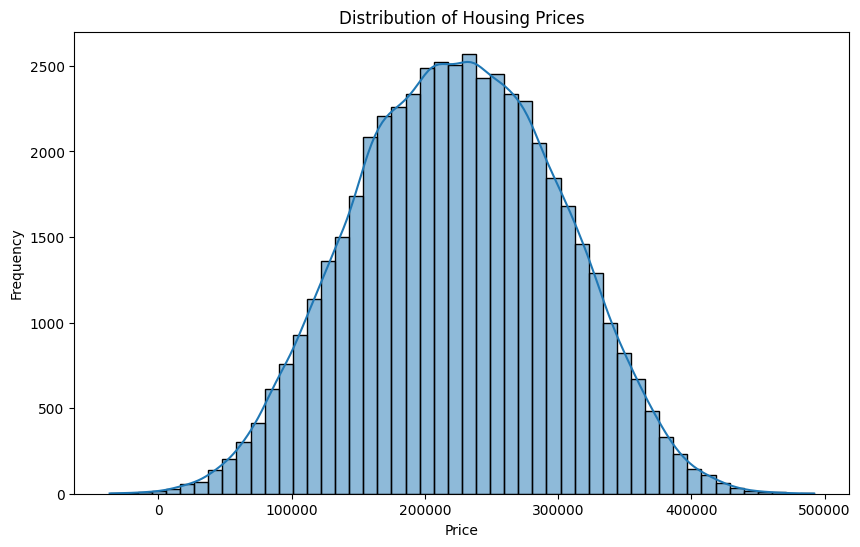

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['Price'], bins=50, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

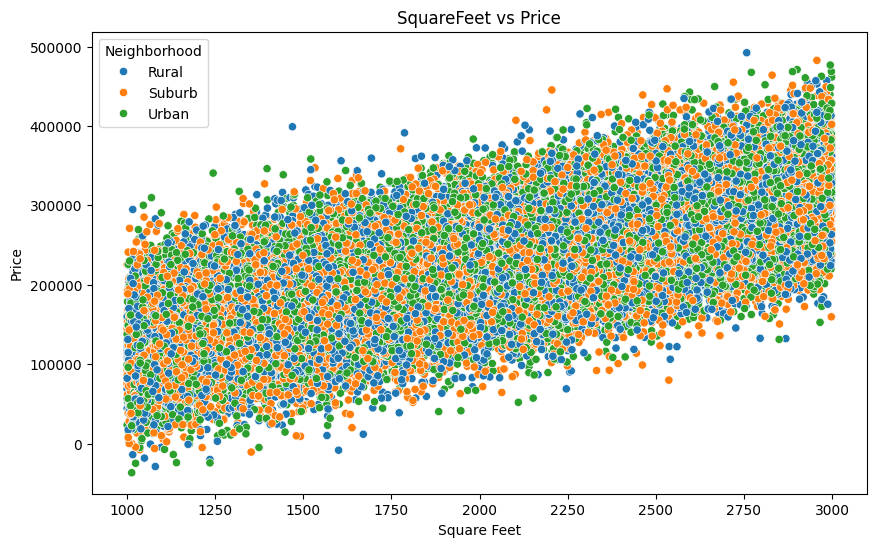

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='SquareFeet', y='Price', hue='Neighborhood')
plt.title('SquareFeet vs Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend(title='Neighborhood')
plt.show()

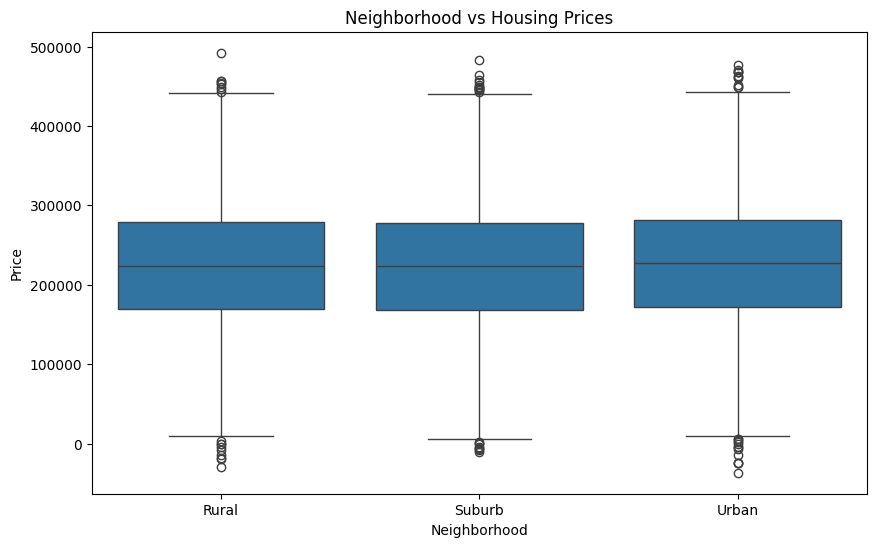

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_data, x='Neighborhood', y='Price')
plt.title('Neighborhood vs Housing Prices')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

In [13]:
housing_data_cleaned = housing_data[housing_data['Price'] > 0]
housing_data_cleaned['LogPrice'] = np.log(housing_data_cleaned['Price'])
cleaned_stats = housing_data_cleaned.describe()

correlation_matrix = housing_data_cleaned[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']].corr()

cleaned_stats

<ipython-input-13-083a03e01caf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data_cleaned['LogPrice'] = np.log(housing_data_cleaned['Price'])


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,LogPrice
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960,12.253236
std,575.350298,1.116325,0.815859,20.718407,75995.682992,0.407968
min,1000.000000,2.000000,1.000000,1950.000000,154.779120,5.041999
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130,12.043598
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857,12.324301
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288,12.540385
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972,13.106631


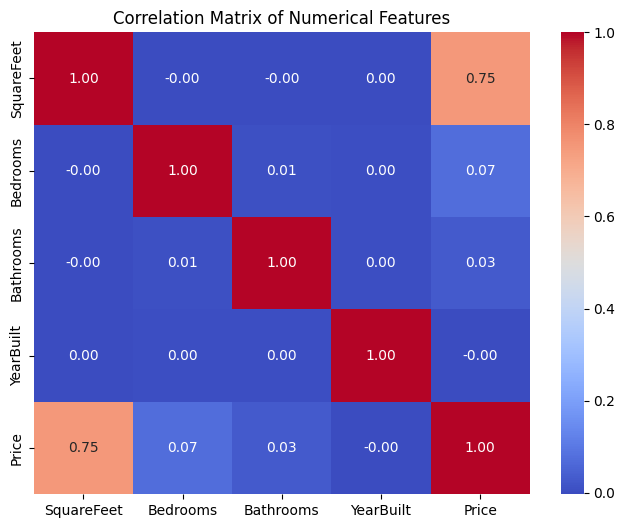

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [16]:
encoder = OneHotEncoder(sparse_output=False)
neighborhood_encoded = encoder.fit_transform(housing_data_cleaned[['Neighborhood']])
neighborhood_df = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out(['Neighborhood']))

housing_data_final = pd.concat([housing_data_cleaned.reset_index(drop=True), neighborhood_df], axis=1).drop(columns=['Neighborhood'])

print("Updated Dataset After Encoding:")
print(housing_data_final.head())

print("\nFeature Names After Encoding:")
print(housing_data_final.columns)

X = housing_data_final.drop(columns=['Price', 'LogPrice'])
y = housing_data_final['LogPrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Updated Dataset After Encoding:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price   LogPrice  \
0        2126         4          1       1969  215355.283618  12.280044   
1        2459         3          2       1980  195014.221626  12.180828   
2        1860         2          1       1970  306891.012076  12.634248   
3        2294         2          1       1996  206786.787153  12.239444   
4        2130         5          2       2001  272436.239065  12.515160   

   Neighborhood_Rural  Neighborhood_Suburb  Neighborhood_Urban  
0                 1.0                  0.0                 0.0  
1                 1.0                  0.0                 0.0  
2                 0.0                  1.0                 0.0  
3                 0.0                  0.0                 1.0  
4                 0.0                  1.0                 0.0  

Feature Names After Encoding:
Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price', 'LogPrice',
       'Neighbor

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [18]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Baseline Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.09
R-squared (R²): 0.4996


In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, mse_rf, r2_rf


(0.21739330570982543, 0.09371926560839763, 0.45467557592071883)

In [20]:
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mae_gbr, mse_gbr, r2_gbr


(0.20319752369755845, 0.08381360191391084, 0.5123136753472579)

In [21]:
model_performance = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"],
    "MAE": [mae, mae_rf, mae_gbr],
    "MSE": [mse, mse_rf, mse_gbr],
    "R-squared": [r2, r2_rf, r2_gbr]
})

model_performance.sort_values(by="R-squared", ascending=False, inplace=True)
model_performance.reset_index(drop=True, inplace=True)

model_performance


,Model,MAE,MSE,R-squared
0,Gradient Boosting Regressor,0.203198,0.083814,0.512314
1,Linear Regression,0.205837,0.085995,0.499619
2,Random Forest Regressor,0.217393,0.093719,0.454676


In [22]:
gbr_single = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)

gbr_single.fit(X_train, y_train)

y_pred_single = gbr_single.predict(X_test)

mae_single = mean_absolute_error(y_test, y_pred_single)
mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print("Final Gradient Boosting Results:")
print(f"Mean Absolute Error (MAE): {mae_single:.3f}")
print(f"Mean Squared Error (MSE): {mse_single:.3f}")
print(f"R-squared (R²): {r2_single:.3f}")



Final Gradient Boosting Results:
Mean Absolute Error (MAE): 0.203
Mean Squared Error (MSE): 0.084
R-squared (R²): 0.513


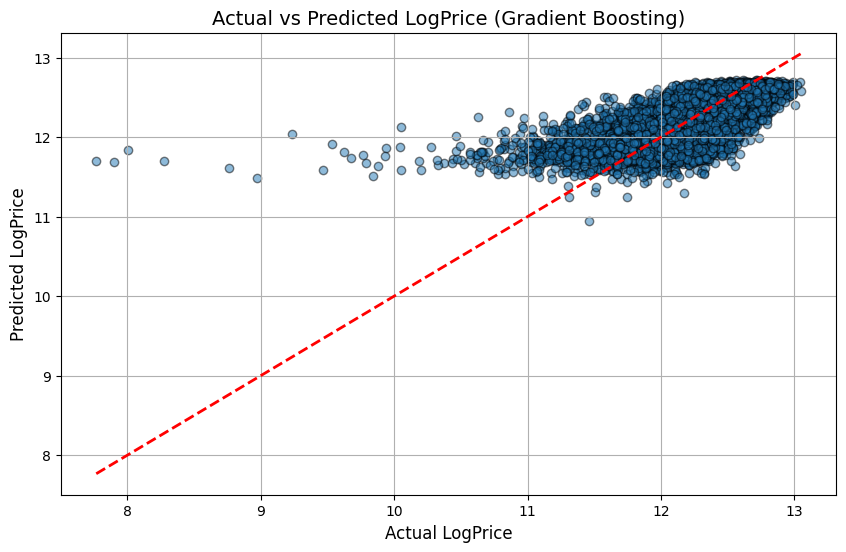

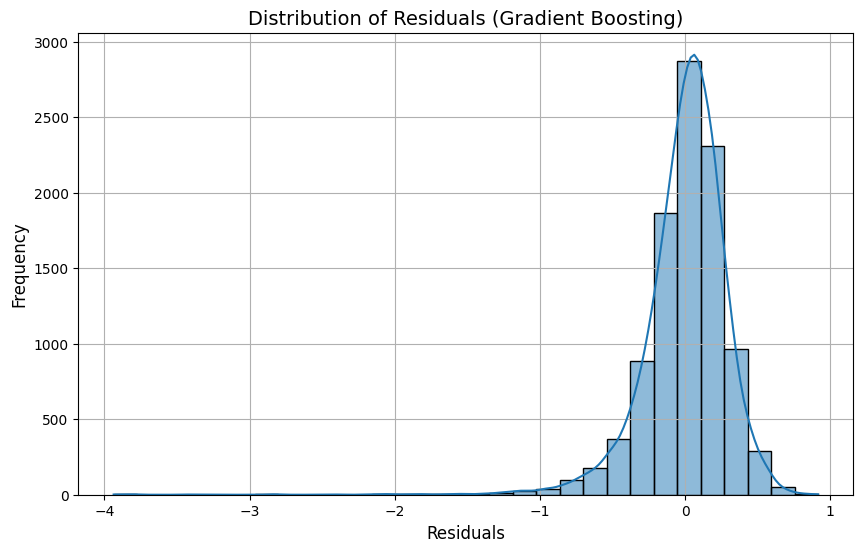

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_single, alpha=0.5, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted LogPrice (Gradient Boosting)', fontsize=14)
plt.xlabel('Actual LogPrice', fontsize=12)
plt.ylabel('Predicted LogPrice', fontsize=12)
plt.grid(True)
plt.show()

residuals = y_test - y_pred_single
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals (Gradient Boosting)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


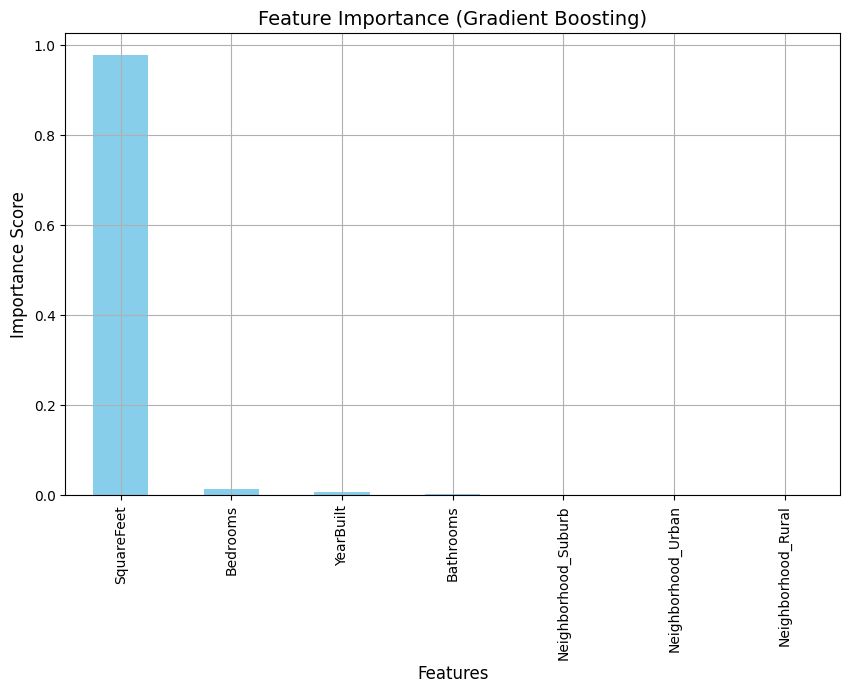

In [24]:
feature_importance = pd.Series(gbr_single.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Gradient Boosting)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.grid(True)
plt.show()


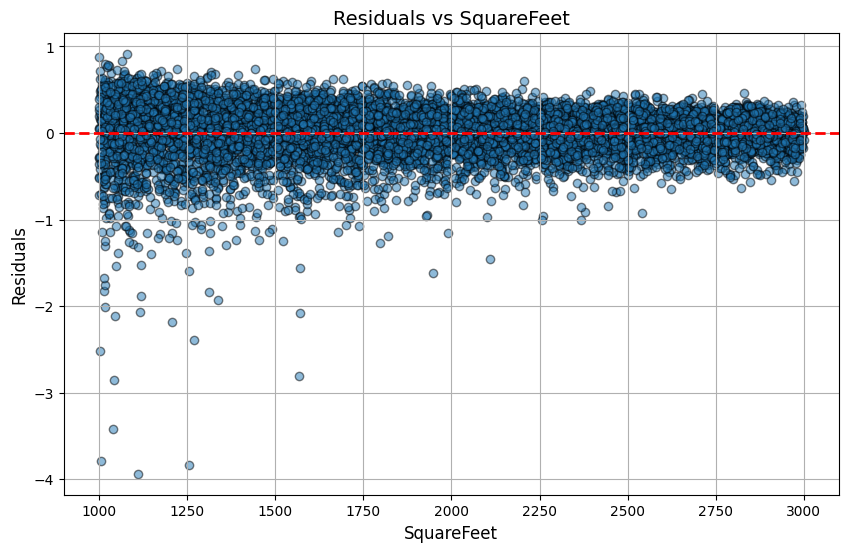

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['SquareFeet'], residuals, alpha=0.5, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs SquareFeet', fontsize=14)
plt.xlabel('SquareFeet', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-26-30c4fb26786c>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  neighborhood_performance = X_test_with_pred.groupby('Neighborhood').apply(


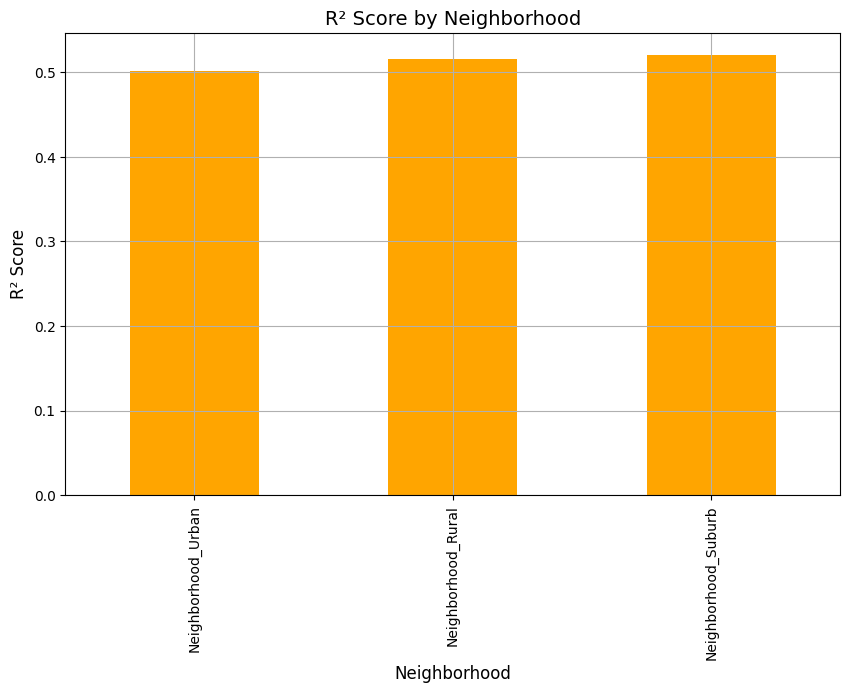

In [26]:
X_test_with_pred = X_test.copy()
X_test_with_pred['Actual'] = y_test
X_test_with_pred['Predicted'] = y_pred_single
X_test_with_pred['Residual'] = residuals

X_test_with_pred['Neighborhood'] = X_test[['Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban']].idxmax(axis=1)

neighborhood_performance = X_test_with_pred.groupby('Neighborhood').apply(
    lambda df: r2_score(df['Actual'], df['Predicted'])
)

plt.figure(figsize=(10, 6))
neighborhood_performance.sort_values().plot(kind='bar', color='orange')
plt.title('R² Score by Neighborhood', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.grid(True)
plt.show()


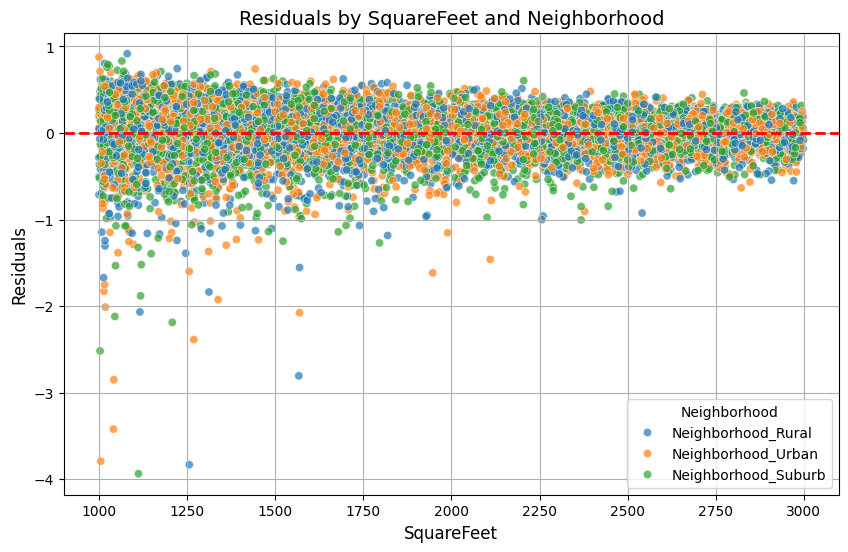

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test_with_pred, x='SquareFeet', y='Residual', hue='Neighborhood', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals by SquareFeet and Neighborhood', fontsize=14)
plt.xlabel('SquareFeet', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend(title='Neighborhood')
plt.grid(True)
plt.show()


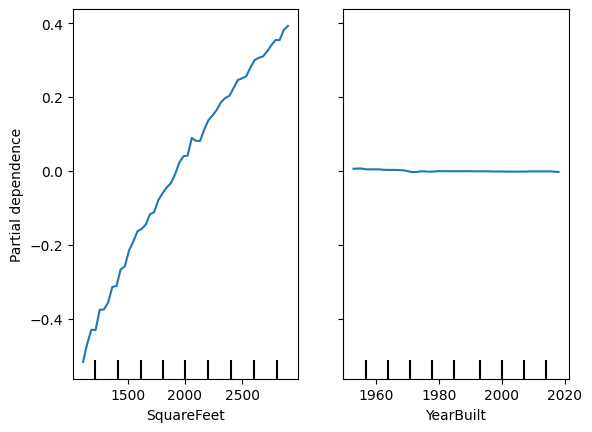

In [28]:
PartialDependenceDisplay.from_estimator(
    gbr_single, X_train, ['SquareFeet', 'YearBuilt'], grid_resolution=50
)
plt.show()


<ipython-input-29-ada265d2cffc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_test_with_pred, x='Neighborhood', y='Actual', palette='pastel')


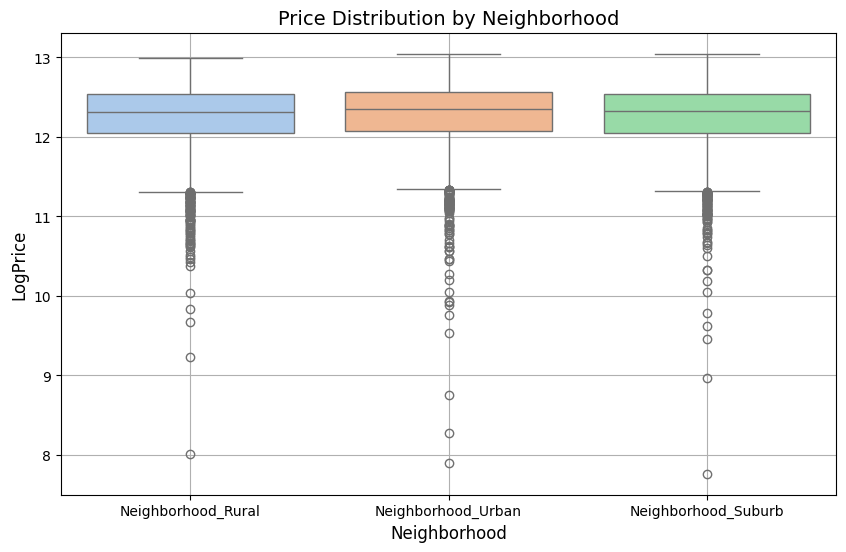

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_test_with_pred, x='Neighborhood', y='Actual', palette='pastel')
plt.title('Price Distribution by Neighborhood', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('LogPrice', fontsize=12)
plt.grid(True)
plt.show()

Summary of High-Error Cases:
        SquareFeet    Bedrooms   Bathrooms    YearBuilt  Neighborhood_Rural  \
count   622.000000  622.000000  622.000000   622.000000          622.000000   
mean   1438.720257    3.416399    1.982315  1984.807074            0.344051   
std     401.857618    1.131565    0.823180    20.915706            0.475440   
min    1000.000000    2.000000    1.000000  1950.000000            0.000000   
25%    1116.000000    2.000000    1.000000  1966.250000            0.000000   
50%    1305.500000    3.000000    2.000000  1983.000000            0.000000   
75%    1677.000000    4.000000    3.000000  2002.000000            1.000000   
max    2971.000000    5.000000    3.000000  2021.000000            1.000000   

       Neighborhood_Suburb  Neighborhood_Urban      Actual   Predicted  \
count           622.000000          622.000000  622.000000  622.000000   
mean              0.336013            0.319936   11.530850   11.948331   
std               0.472723           

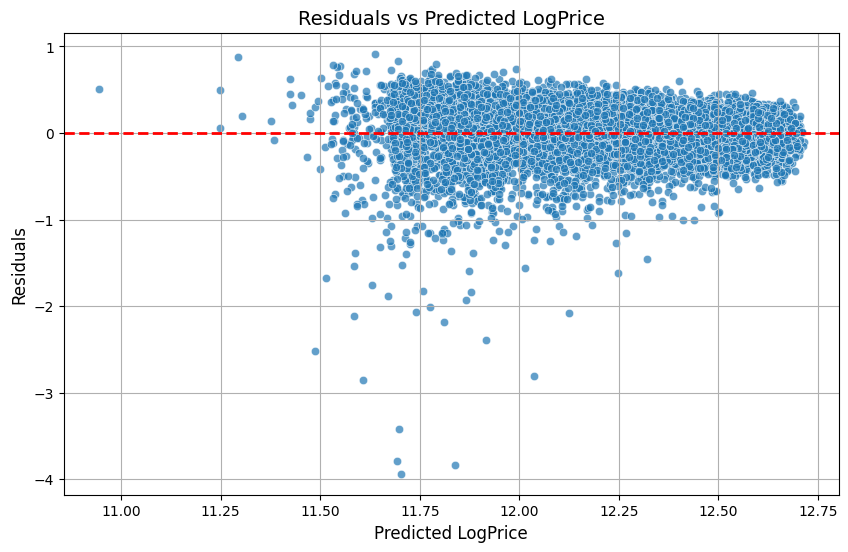

<ipython-input-30-c9b5a3d566de>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=high_error_cases, x='Neighborhood', y='Residual', palette='pastel')


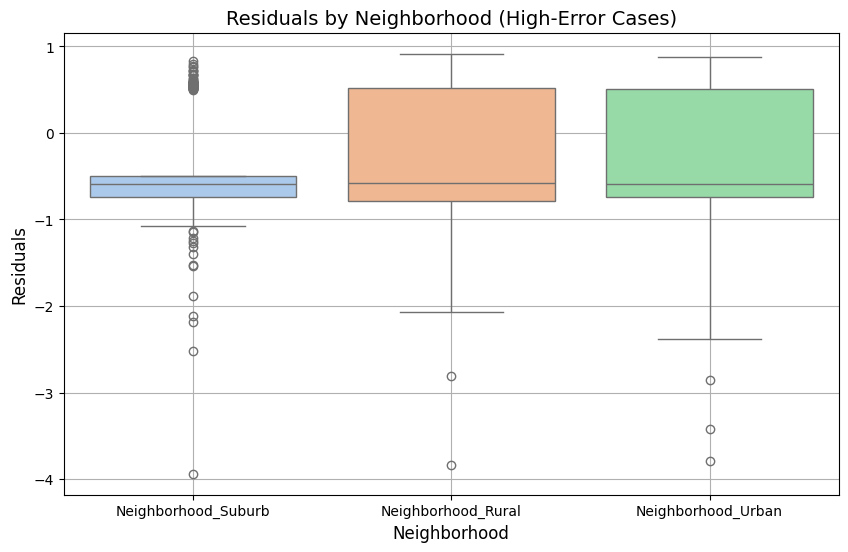

In [30]:
high_error_cases = X_test_with_pred[abs(X_test_with_pred['Residual']) > 0.5]

print("Summary of High-Error Cases:")
print(high_error_cases.describe())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residual', data=X_test_with_pred, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted LogPrice', fontsize=14)
plt.xlabel('Predicted LogPrice', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=high_error_cases, x='Neighborhood', y='Residual', palette='pastel')
plt.title('Residuals by Neighborhood (High-Error Cases)', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()


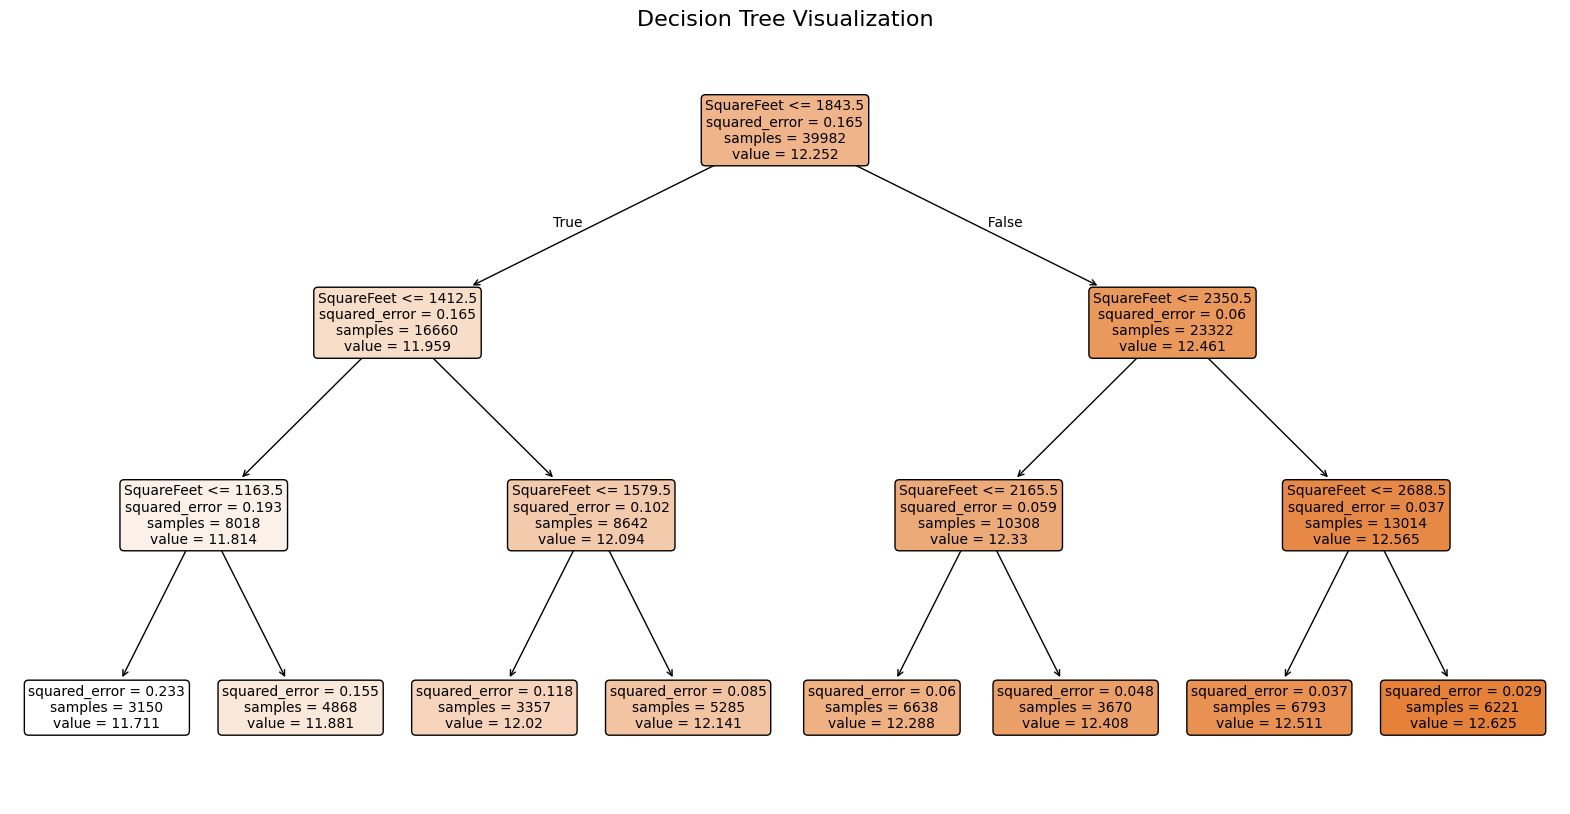

In [31]:
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()